In [10]:
# Imports
import json
from pandas.io.json import json_normalize
import requests
import pyspark as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from textwrap import wrap
import folium
import plotly.graph_objects as go
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
STOPWORDS.add("br")

In [2]:
# Methods
def unpack_column(dataFrame,col_name):
    newDf = dataFrame.from_records(dataFrame[col_name].dropna().tolist())
    return newDf

def unpack_and_destroy(dataFrame,column):
    temp = unpack_column(dataFrame,column)
    for col in temp.columns:
        dataFrame[col] = temp[col]
    #dataFrame = dataFrame.drop(columns=[column])
    return dataFrame

def sort_db_value(db,value,asc=False):
    return db.sort_values(by = value, ascending = asc)

def freq_array(freq_list):
    freq = []
    for i in freq_list:
        freq.append(i)
    return freq

def set_labels(freq, ax,horz_shift=.2,vert_shift=1000,w="bold",fsize=10,c="b"):
    for i, v in enumerate(freq):
        ax.text(i-horz_shift,v+vert_shift, str(round(v,2)), weight = w,fontsize=fsize,color = c)
        
def wrap_axis_labels(labels_list,wrap_length=13):
    labels_list = [ '\n'.join(wrap(l, wrap_length)) for l in labels_list]
    return labels_list


In [3]:
API_df = pd.read_csv('Data/API_DF_CN.csv')

In [16]:
# pd.set_option('display.max_colwidth', -1)
API_df.head(0)

,charityName,ein,mission,tagLine,categoryID,categoryName,causeID,causeName,rating,assetAmount,classification,deductibility,deductibilityCode,incomeAmount,nteeClassification,nteeType,city,postalCode,stateOrProvince,streetAddress1


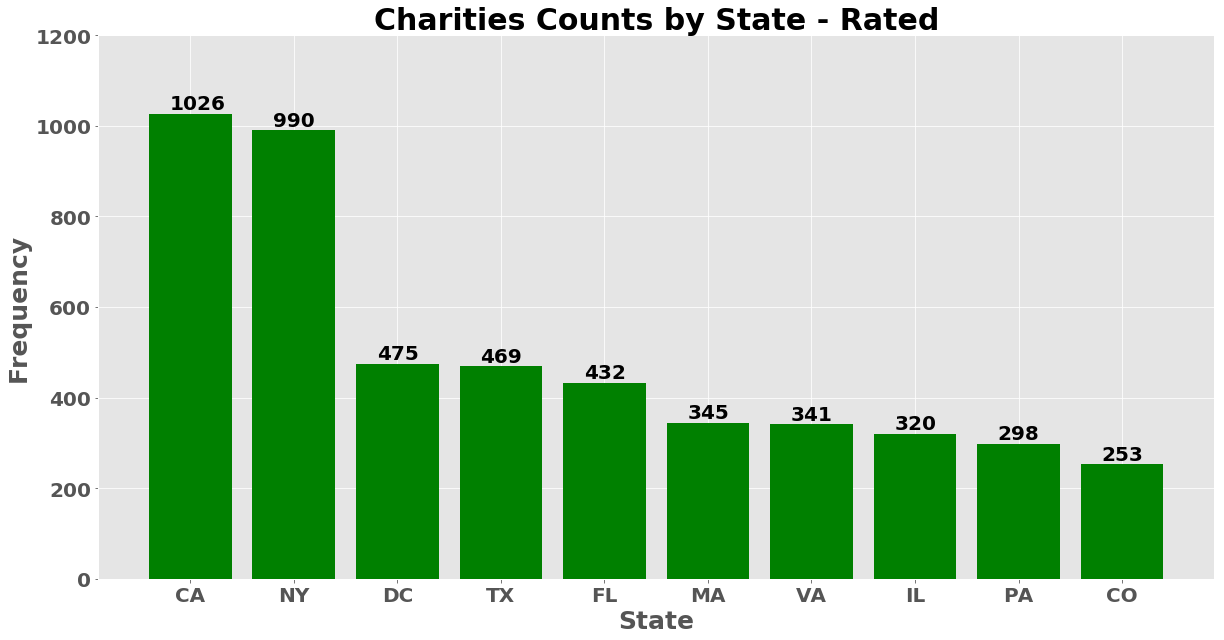

In [26]:
# Charity Count Bar Graph Total - By State
category_count = API_df.groupby('stateOrProvince').size().sort_values(ascending=False)
category_count = category_count.iloc[0:10]
categories = list(category_count.index.values)
categories = wrap_axis_labels(categories,13)

freq = freq_array(category_count)
    
fig,ax = plt.subplots(figsize = (20,10))
ax.bar(categories,freq, color = "g");
ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=20)

# Needs Adjustment based on Data
ax.set_yticks(np.arange(0,np.max(freq)+200,200)) ;
ax.set_title("Charities Counts by State - Rated", weight = "bold",fontsize=30);
ax.set_xlabel("State", fontsize=25, weight = "bold");
ax.set_ylabel("Frequency", fontsize=25, weight = "bold");
ax.set_yticklabels(np.arange(0,np.max(freq)+200,200), weight="bold", fontsize =20) ;


set_labels(freq,ax,.20,(np.max(freq)/100),fsize=20,c="k")
plt.savefig("Charities_by_state")

In [47]:
# # Charity Count Bar Graph Total - By Category
# category_count = API_df.groupby('categoryName').size()
# categories = list(category_count.index.values)
# categories = wrap_axis_labels(categories,13)

# freq = freq_array(category_count)
    
# fig,ax = plt.subplots(figsize = (20,10))
# ax.bar(categories,freq, color = "b");
# ax.set_xticklabels(categories, rotation=0, weight = "bold",fontsize=12)

# # Needs Adjustment based on Data
# ax.set_yticks(np.arange(0,np.max(freq)+200,200)) ;
# ax.set_title("Charities by Category", weight = "bold",fontsize=30);
# ax.set_xlabel("Category", fontsize=25, weight = "bold");
# ax.set_ylabel("Frequency", fontsize=25, weight = "bold");
# ax.set_yticklabels(np.arange(0,np.max(freq)+200,200), weight="bold", fontsize =15) ;


# set_labels(freq,ax,.20,(np.max(freq)/100),fsize=15,c="k")
# plt.savefig("Charities_by_category")

In [46]:
# # 4 vs. 3 -Star Charities Count Bar Graph
# Four_Star_Charities_Total = API_df[API_df['rating'] == 4.0]
# Three_Star_Charities_Total = API_df[API_df['rating'] == 3.0]

# #Four-Star
# four_star_count = Four_Star_Charities_Total.groupby("categoryName").size()
# categories = list(four_star_count.index.values)
# categories = wrap_axis_labels(categories,13)

# ind = np.arange(len(categories)) 

# freq = freq_array(four_star_count)
    
# fig,ax = plt.subplots(figsize = (18,10),sharex=True,sharey=True)
# ax.bar(ind,freq, color = "b",width=0.35,label="Four-Star Charities");

# # Needs Adjustment based on Data

# ax.set_yticklabels(np.arange(0,np.max(freq)+200,100), weight="bold", fontsize =12) ;
# ax.set_title("Four-Star vs. Three-Star Charities by Category", weight = "bold",fontsize=25);
# ax.set_xlabel("Category", fontsize=20, weight = "bold");
# ax.set_ylabel("Frequency", fontsize=20, weight = "bold");

# set_labels(freq,ax,.2,(np.max(freq)/100),fsize=14,c="blue")
    
# #Three-Star
# three_star_count = Three_Star_Charities_Total.groupby("categoryName").size()
# categories_2 = list(three_star_count.index.values)

# ind_2 = np.arange(len(categories_2)) 

# freq_2 = freq_array(three_star_count)
    
# ax.bar(ind_2+.35,freq_2, color = "orange",width=0.35,label="Three-Star Charities");

# # Needs Adjustment based on Data
# # ax.set_yticks(np.arange(0,np.max(freq)+200,200)) ;
# # ax.set_title("Four-Star Charities by Category", weight = "bold",fontsize=19);
# # ax.set_xlabel("Category", fontsize=15, weight = "bold");
# # ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

# set_labels(freq_2,ax,-.2,(np.max(freq)/100),fsize=14,c='black')

# ax.set_yticks(np.arange(0,(np.max(freq)+100),100)) ;
# ax.set_xticks(ind + .35 / 2)
# ax.set_xticklabels(categories, weight="bold",fontsize=11);
# ax.legend(prop={'size': 20});

# # plt.savefig("Four_Star_vs_Three_Star_Categories")

In [28]:
# state_df = API_df.groupby("stateOrProvince").size().reset_index(name="Count")
# fig = go.Figure(data=go.Choropleth(
#     locations = state_df['stateOrProvince'],
#     z=state_df['Count'],
#     locationmode='USA-states',
#     colorscale='Greens',
#     autocolorscale=False,
#     text=state_df['stateOrProvince'], # hover text
#     marker_line_color='black', # line markers between states
#     colorbar_title="Number of Charities"
# ))

# fig.update_layout(
#     title_text='Number of US Charitable Organizations by State - Rated<br>(Hover for breakdown)',
#     geo = dict(
#         scope='usa',
#         projection=go.layout.geo.Projection(type = 'albers usa'),
#         showlakes=True, # lakes
#         lakecolor='rgb(255, 255, 255)'),
# )

# fig.show()

In [29]:
API_df.head(0)

,charityName,ein,mission,tagLine,categoryID,categoryName,causeID,causeName,rating,assetAmount,classification,deductibility,deductibilityCode,incomeAmount,nteeClassification,nteeType,city,postalCode,stateOrProvince,streetAddress1


In [14]:
# text = API_df.mission.values
# wordcloud = WordCloud(
#     width = 3000,
#     height = 2000,
#     background_color = 'white',
# #     color_func = 'grey',
#     stopwords = STOPWORDS).generate(' '.join(text))
# fig = plt.figure(
#     figsize = (20, 15),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.savefig("Mission_Wordmap")
# plt.show()

In [36]:
pop_data = pd.read_csv('Data/acs2017_census_tract_data.csv')
pop_data = pop_data.groupby("State")["TotalPop"].sum().reset_index(name="Population")
pop_abbrv = pd.read_csv('Data/states.csv')
pop_df = pd.merge(pop_data, pop_abbrv, on='State')
pop_df["stateOrProvince"] = pop_df["Abbreviation"]
pop_df = pop_df.drop(columns=["Abbreviation"])

In [50]:
category_count = API_df.groupby('stateOrProvince').size().sort_values(ascending=False).reset_index(name="count")
category_count.head()

,stateOrProvince,count
0,CA,1026
1,NY,990
2,DC,475
3,TX,469
4,FL,432


In [61]:
income_df = API_df.groupby("stateOrProvince")["incomeAmount"].sum().reset_index(name="Sum_Income")

In [62]:
income_df

,stateOrProvince,Sum_Income
0,AK,5.460533e+07
1,AL,7.312696e+08
2,AR,3.310466e+08
3,AZ,2.766602e+09
4,CA,2.580526e+10
5,CO,4.255361e+09
6,CT,3.343790e+09
7,DC,1.891980e+10
8,DE,2.298511e+08
9,FL,9.817163e+09


In [45]:
add_pop = pd.merge(pop_df, category_count, on = "stateOrProvince")

In [54]:
add_pop["Num_Charities_Per_Capita"] = (add_pop["count"] / add_pop["Population"])*10000

In [63]:
add_pop = pd.merge(add_pop, income_df, on = "stateOrProvince")

In [64]:
add_pop.head()

,State,Population,stateOrProvince,count,Num_Charities_Per_Capita,Sum_Income
0,Alabama,4850771,AL,67,0.138122,7.312696e+08
1,Alaska,738565,AK,17,0.230176,5.460533e+07
2,Arizona,6809946,AZ,128,0.187960,2.766602e+09
3,Arkansas,2977944,AR,32,0.107457,3.310466e+08
4,California,38982847,CA,1026,0.263193,2.580526e+10


In [56]:
fig = go.Figure(data=go.Choropleth(
    locations = add_pop['stateOrProvince'],
    z=add_pop['Num_Charities_Per_Capita'],
    locationmode='USA-states',
    colorscale='Greens',
    autocolorscale=False,
    text=add_pop['stateOrProvince'], # hover text
    marker_line_color='black', # line markers between states
    colorbar_title="Number of Charities"
))

fig.update_layout(
    title_text='Number of US Charitable Organizations by State - Rated<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()